In [1]:
import pandas as pd
import numpy as np

from google.colab import files

In [2]:
!pip install -q kaggle

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 21.7MB/s]


In [6]:
!unzip -q /content/supermarket-sales.zip -d .

In [7]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.shape

(1000, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
# converting date columns into a date
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# create new columns from date and time
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = list(map(lambda D: D.strftime("%B"), df['Date']))
df['Day'] = list(map(lambda date: date.strftime("%A"), df['Date']))

df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [14]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,2019.0,20.000000


In [15]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
Day                        0
Hour                       0
dtype: int64

In [16]:
df.rename(columns={'Customer type':'customer_type', 'Product line':'product_line', 'Unit price':'unit_price', 'Tax 5%':'Tax_5%', 'gross margin percentage':'gross_margin_percentage', 'gross income':'gross_income'}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax_5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

# Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

### Most frequently used payment methods by gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


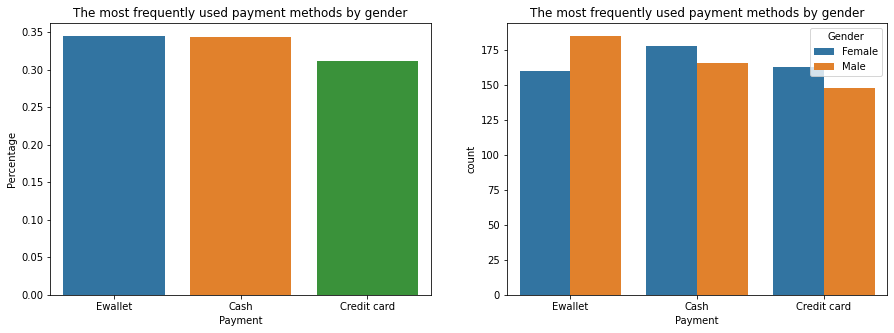

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
eda_percentage = df['Payment'].value_counts(normalize = True).rename_axis('Payment').reset_index(name = 'Percentage')
sns.barplot(x = 'Payment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('The most frequently used payment methods by gender')
plt.subplot(1,2,2)
sns.countplot(df['Payment'], hue = df['Gender'])
plt.title('The most frequently used payment methods by gender')
plt.show()

df.Payment.value_counts()

### Total sold per city

In [20]:
total_sold= df.groupby('City')[['Quantity']].sum().reset_index()
total_sold

,City,Quantity
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


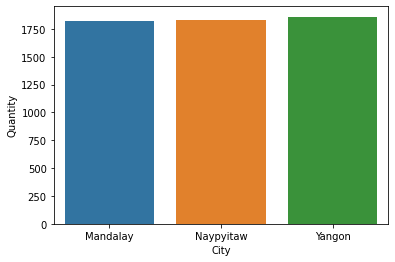

In [21]:
sns.barplot(x='City',y='Quantity',data=total_sold)

### Total sold per product line

In [22]:
product_sold= df.groupby('product_line')[['Quantity']].sum().reset_index()
product_sold

,product_line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


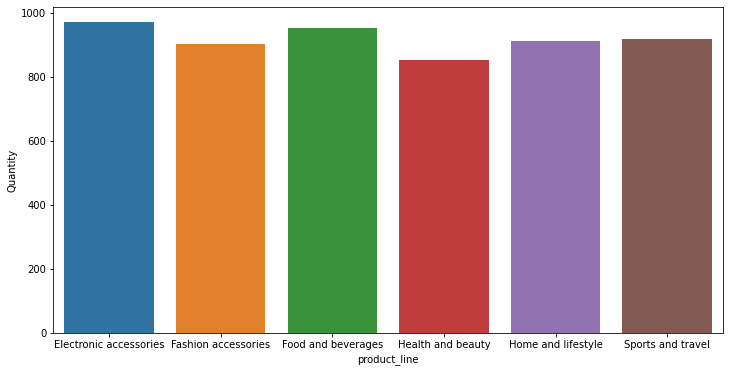

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='product_line',y='Quantity',data=product_sold)

### Types of products most purchased by gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


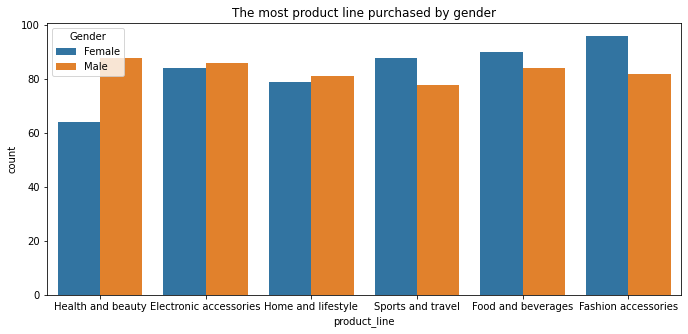

In [24]:
plt.figure(figsize = (25,5))
plt.subplot(1,2,2)
sns.countplot(df['product_line'], hue = df['Gender'])
plt.title('The most product line purchased by gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


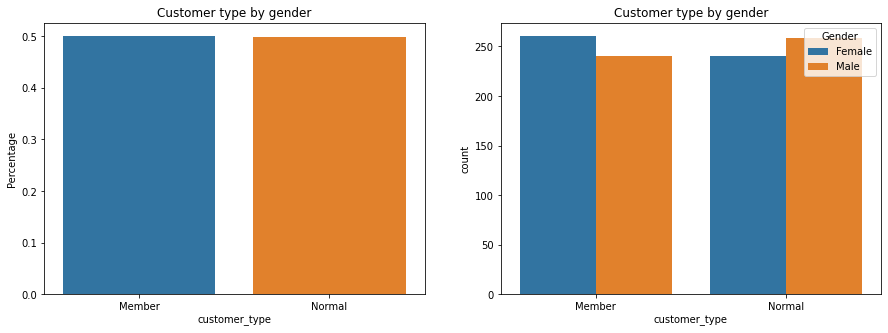

Member    501
Normal    499
Name: customer_type, dtype: int64

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
eda_percentage = df['customer_type'].value_counts(normalize = True).rename_axis('customer_type').reset_index(name = 'Percentage')
sns.barplot(x = 'customer_type', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Customer type by gender')
plt.subplot(1,2,2)
sns.countplot(df['customer_type'], hue = df['Gender'])
plt.title('Customer type by gender')
plt.show()

df.customer_type.value_counts()

### Which city is the most gross income?

In [34]:
most_gi_city= df.groupby('City')[['gross_income']].sum().reset_index()
most_gi_city

,City,gross_income
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

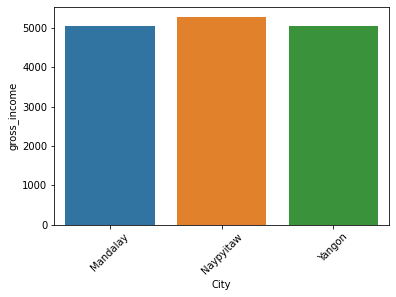

In [35]:
sns.barplot(x='City',y='gross_income',data=most_gi_city)
plt.xticks(rotation=45)

### What day is the most gross income?

In [26]:
most_gi= df.groupby('Day')[['gross_income']].sum().reset_index()
most_gi

,Day,gross_income
0,Friday,2091.7305
1,Monday,1804.7180
2,Saturday,2672.4195
3,Sunday,2117.0425
4,Thursday,2159.4880
5,Tuesday,2451.5355
6,Wednesday,2082.4350


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

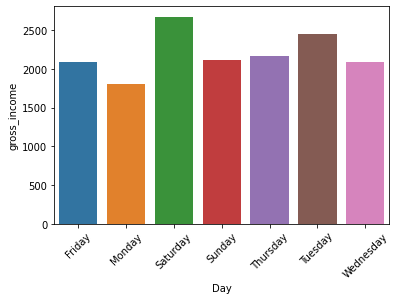

In [27]:
sns.barplot(x='Day',y='gross_income',data=most_gi)
plt.xticks(rotation=45)

### What hour of the day is the busiest?

Text(0.5, 1.0, 'Number of products sold per hour')

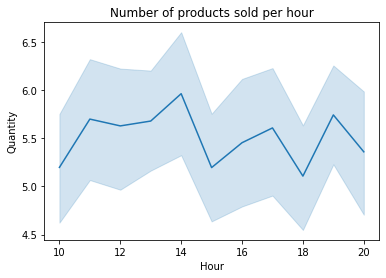

In [28]:
sns.lineplot(x="Hour",y='Quantity',data =df).set_title("Number of products sold per hour")

In [29]:
sold_month= df.groupby('Month')[['Quantity']].sum().reset_index()
sold_month

,Month,Quantity
0,February,1654
1,January,1965
2,March,1891


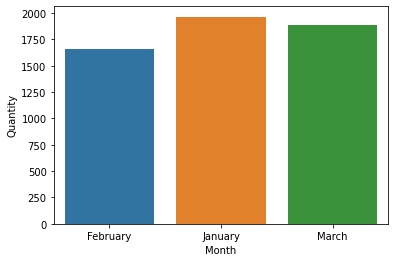

In [30]:
sns.barplot(x='Month',y='Quantity',data=sold_month)

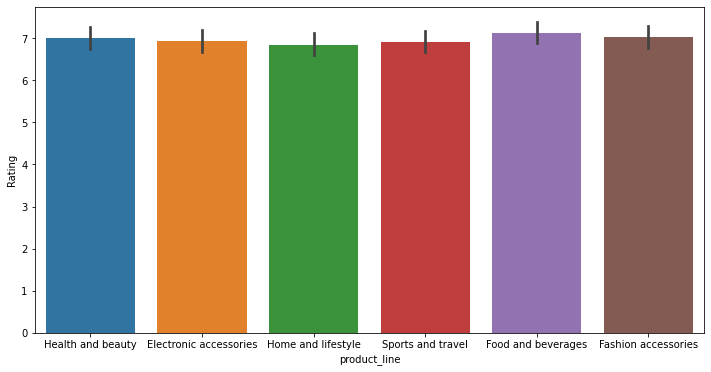

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=df['product_line'],y=df['Rating'],data=df)

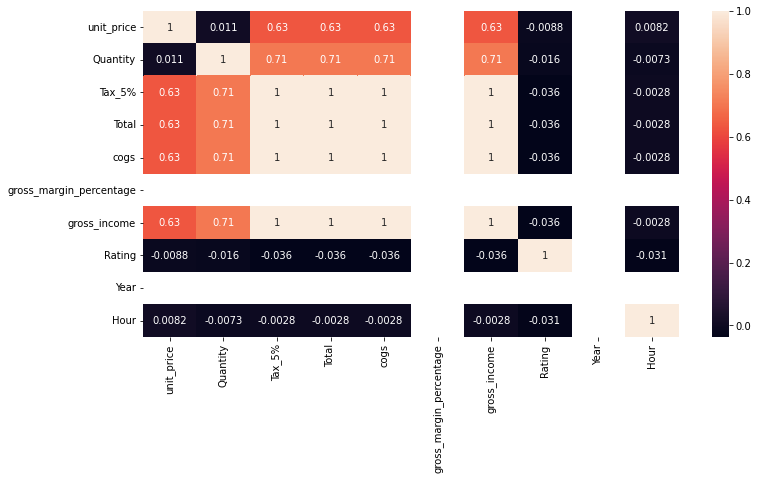

In [39]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()